# Crypto Website API pull 

In [14]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e313bdff-6636-46ef-bc12-16cbd1b4da60',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-05-23T03:03:57.537Z', 'error_code': 0, 'error_message': None, 'elapsed': 11, 'credit_count': 1, 'notice': None, 'total_count': 10007}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11066, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [15]:
type(data)

dict

In [16]:
import pandas as pd

pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-05-23T03:03:57.537Z,0,None,11,1,None,10007


In [17]:
pd.set_option('display.max_columns', None)

df = pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11066,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.970205e+07,1.970205e+07,False,NaN,1,NaN,NaN,NaN,2024-05-23T03:02:00.000Z,69398.735120,3.201477e+10,-21.8620,-0.070206,-0.901250,5.158517,4.013604,8.059937,35.925277,1.367298e+12,52.9333,1.457373e+12,NaN,2024-05-23T03:02:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,8982,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201299e+08,1.201299e+08,True,NaN,2,NaN,NaN,NaN,2024-05-23T03:01:00.000Z,3767.221345,2.490559e+10,-26.0787,0.256819,-0.690367,25.319903,17.775712,12.658261,28.118213,4.525561e+11,17.5308,4.525561e+11,NaN,2024-05-23T03:01:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,86223,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.117526e+11,1.150866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-23T03:01:00.000Z,0.999399,7.416318e+10,-21.4391,-0.011660,-0.057291,-0.083482,-0.126073,-0.103036,-0.019300,1.116855e+11,4.3264,1.150174e+11,NaN,2024-05-23T03:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,2166,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475860e+08,1.475860e+08,False,NaN,4,NaN,NaN,NaN,2024-05-23T03:01:00.000Z,615.414760,2.092692e+09,-34.8296,0.065585,-0.746384,5.634741,2.379784,10.578316,62.025593,9.082660e+10,3.5184,9.082660e+10,NaN,2024-05-23T03:01:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,662,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.491618e+08,5.764757e+08,True,NaN,5,NaN,NaN,NaN,2024-05-23T03:01:00.000Z,178.655052,3.784896e+09,-7.4467,0.623035,0.588012,10.674776,13.618322,2.402851,76.196743,8.024503e+10,3.1085,1.029903e+11,NaN,2024-05-23T03:01:00.000Z,NaN,NaN,NaN,NaN,NaN
5,3408,USDC,USDC,usd-coin,19324,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.307060e+10,3.307060e+10,False,NaN,6,NaN,NaN,NaN,2024-05-23T03:01:00.000Z,0.999974,7.991104e+09,-19.2880,0.000404,-0.004147,-0.003673,-0.013235,-0.020954,-0.013391,3.306973e+10,1.2810,3.306973e+10,NaN,2024-05-23T03:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
6,52,XRP,XRP,xrp,1323,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.528895e+10,9.998761e+10,False,NaN,7,NaN,NaN,NaN,2024-05-23T03:02:00.000Z,0.527488,1.187875e+09,-34.6665,0.002461,-1.582132,2.150046,-4.259038,-14.826054,-1.989302,2.916427e+10,1.1291,5.274883e+10,NaN,2024-05-23T03:02:00.000Z,NaN,NaN,NaN,NaN,NaN
7,74,Dogecoin,DOGE,dogecoin,970,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.444023e+11,1.444023e+11,True,NaN,8,NaN,NaN,NaN,2024-05-23T03:02:00.000Z,0.166962,1.714580e+09,-38.8746,0.211707,-2.606015,7.443684,4.485060,-2.572135,99.566309,2.410963e+10,0.9334,2.410963e+10,NaN,2024-05-23T03:02:00.000Z,NaN,NaN,NaN,NaN,NaN
8,11419,Toncoin,TON,toncoin,338,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474576e+09,5.106868e+09,True,NaN,9,3.414167e+09,2.263762e+10,NaN,2024-05-23T03:01:00.000Z,6.630496,3.446179e+08,29.5064,-0.138845,5.217601,-5.565985,10.876997,34.150304,219.285282,2.303816e+10,0.8924,3.386107e+10,NaN,2024-05-23T03:01:00.000Z,NaN,N

Now we wanna automate this data collection process

In [18]:
# Let's add a timestamp column in order to keep in check of when the data
# is being pulled.

df['Timestamp'] = pd.to_datetime('now')
df

C:\Users\bindu\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11066,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.970205e+07,1.970205e+07,False,NaN,1,NaN,NaN,NaN,2024-05-23T03:02:00.000Z,69398.735120,3.201477e+10,-21.8620,-0.070206,-0.901250,5.158517,4.013604,8.059937,35.925277,1.367298e+12,52.9333,1.457373e+12,NaN,2024-05-23T03:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:03:55.536534
1,1027,Ethereum,ETH,ethereum,8982,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201299e+08,1.201299e+08,True,NaN,2,NaN,NaN,NaN,2024-05-23T03:01:00.000Z,3767.221345,2.490559e+10,-26.0787,0.256819,-0.690367,25.319903,17.775712,12.658261,28.118213,4.525561e+11,17.5308,4.525561e+11,NaN,2024-05-23T03:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:03:55.536534
2,825,Tether USDt,USDT,tether,86223,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.117526e+11,1.150866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-23T03:01:00.000Z,0.999399,7.416318e+10,-21.4391,-0.011660,-0.057291,-0.083482,-0.126073,-0.103036,-0.019300,1.116855e+11,4.3264,1.150174e+11,NaN,2024-05-23T03:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-23 03:03:55.536534
3,1839,BNB,BNB,bnb,2166,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475860e+08,1.475860e+08,False,NaN,4,NaN,NaN,NaN,2024-05-23T03:01:00.000Z,615.414760,2.092692e+09,-34.8296,0.065585,-0.746384,5.634741,2.379784,10.578316,62.025593,9.082660e+10,3.5184,9.082660e+10,NaN,2024-05-23T03:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:03:55.536534
4,5426,Solana,SOL,solana,662,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.491618e+08,5.764757e+08,True,NaN,5,NaN,NaN,NaN,2024-05-23T03:01:00.000Z,178.655052,3.784896e+09,-7.4467,0.623035,0.588012,10.674776,13.618322,2.402851,76.196743,8.024503e+10,3.1085,1.029903e+11,NaN,2024-05-23T03:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:03:55.536534
5,3408,USDC,USDC,usd-coin,19324,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.307060e+10,3.307060e+10,False,NaN,6,NaN,NaN,NaN,2024-05-23T03:01:00.000Z,0.999974,7.991104e+09,-19.2880,0.000404,-0.004147,-0.003673,-0.013235,-0.020954,-0.013391,3.306973e+10,1.2810,3.306973e+10,NaN,2024-05-23T03:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-23 03:03:55.536534
6,52,XRP,XRP,xrp,1323,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.528895e+10,9.998761e+10,False,NaN,7,NaN,NaN,NaN,2024-05-23T03:02:00.000Z,0.527488,1.187875e+09,-34.6665,0.002461,-1.582132,2.150046,-4.259038,-14.826054,-1.989302,2.916427e+10,1.1291,5.274883e+10,NaN,2024-05-23T03:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:03:55.536534
7,74,Dogecoin,DOGE,dogecoin,970,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.444023e+11,1.444023e+11,True,NaN,8,NaN,NaN,NaN,2024-05-23T03:02:00.000Z,0.166962,1.714580e+09,-38.8746,0.211707,-2.606015,7.443684,4.485060,-2.572135,99.566309,2.410963e+10,0.9334,2.410963e+10,NaN,2024-05-23T03:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:03:55.536534
8,11419,Toncoin,TON,toncoin,338,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474576e+09,5.106868e+

In [26]:
def api_runner():
    # making df global to use it in this function
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'50',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e313bdff-6636-46ef-bc12-16cbd1b4da60',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #df2 = pd.json_normalize(data['data'])
    #df2['Timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)
    
    # Or you can just append it to a csv and read it later on
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\bindu\Documents\DA\Python\Pandas\crypto.csv'):
        df.to_csv(r'C:\Users\bindu\Documents\DA\Python\Pandas\crypto.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\bindu\Documents\DA\Python\Pandas\crypto.csv', mode = 'a', header = False)
   

In [27]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(60)
exit()

C:\Users\bindu\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API runner completed


C:\Users\bindu\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API runner completed


C:\Users\bindu\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API runner completed


C:\Users\bindu\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API runner completed


C:\Users\bindu\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API runner completed


KeyboardInterrupt: 

In [28]:
pd.set_option('display.max_rows', None)

df1 = pd.read_csv(r'C:\Users\bindu\Documents\DA\Python\Pandas\crypto.csv')
df1

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11066,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.970205e+07,1.970205e+07,False,NaN,1,NaN,NaN,NaN,2024-05-23T03:48:00.000Z,69296.523548,3.169099e+10,-21.8738,-0.225844,-0.941511,4.951389,4.049042,8.023449,35.692665,1.365284e+12,52.9271,1.455227e+12,NaN,2024-05-23T03:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:50:35.880803
1,1,1027,Ethereum,ETH,ethereum,8982,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201299e+08,1.201299e+08,True,NaN,2,NaN,NaN,NaN,2024-05-23T03:48:00.000Z,3765.195542,2.462607e+10,-26.4816,-0.106854,-0.651591,24.891334,18.023301,13.265492,27.523786,4.523127e+11,17.5345,4.523127e+11,NaN,2024-05-23T03:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:50:35.880803
2,2,825,Tether USDt,USDT,tether,86223,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.117526e+11,1.150866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-23T03:48:00.000Z,0.999385,7.370973e+10,-21.2717,-0.018139,-0.044884,-0.086102,-0.148908,-0.087641,-0.018841,1.116839e+11,4.3296,1.150158e+11,NaN,2024-05-23T03:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-23 03:50:35.880803
3,3,1839,BNB,BNB,bnb,2166,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475860e+08,1.475860e+08,False,NaN,4,NaN,NaN,NaN,2024-05-23T03:48:00.000Z,613.772227,2.081296e+09,-35.1901,-0.214817,-1.206841,5.031167,1.687033,11.217648,62.204161,9.058419e+10,3.5116,9.058419e+10,NaN,2024-05-23T03:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:50:35.880803
4,4,5426,Solana,SOL,solana,662,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.491618e+08,5.764757e+08,True,NaN,5,NaN,NaN,NaN,2024-05-23T03:48:00.000Z,178.097244,3.781476e+09,-6.8500,0.128550,0.377823,9.000337,14.077691,3.005334,75.297616,7.999449e+10,3.1011,1.026687e+11,NaN,2024-05-23T03:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:50:35.880803
5,5,3408,USDC,USDC,usd-coin,19324,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.307060e+10,3.307060e+10,False,NaN,6,NaN,NaN,NaN,2024-05-23T03:48:00.000Z,1.000051,7.950462e+09,-18.7297,-0.001313,0.007683,0.013631,-0.025079,-0.001983,-0.004436,3.307227e+10,1.2821,3.307227e+10,NaN,2024-05-23T03:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-23 03:50:35.880803
6,6,52,XRP,XRP,xrp,1323,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.528895e+10,9.998761e+10,False,NaN,7,NaN,NaN,NaN,2024-05-23T03:49:00.000Z,0.528375,1.180392e+09,-34.6337,0.192858,-1.424321,1.983983,-3.963658,-14.325226,-1.713995,2.921332e+10,1.1325,5.283754e+10,NaN,2024-05-23T03:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:50:35.880803
7,7,74,Dogecoin,DOGE,dogecoin,970,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.444023e+11,1.444023e+11,True,NaN,8,NaN,NaN,NaN,2024-05-23T03:49:00.000Z,0.166909,1.682338e+09,-40.4896,0.078604,-2.435048,5.777693,4.900285,-2.013820,99.166520,2.410210e+10,0.9344,2.410210e+10,NaN,2024-05-23T03:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:50:35.880803
8,8,11419,Toncoin,TON,toncoin,338,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...

Transform the data

In [29]:
pd.set_option('display.float_format', lambda x: '%.5f' %x )

In [30]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11066,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19702053.00000,19702053.00000,False,NaN,1,NaN,NaN,NaN,2024-05-23T03:54:00.000Z,69325.31318,31682856566.01783,-21.81220,-0.10816,-0.85400,4.93815,4.16205,8.19836,35.78090,1365850994554.06226,52.91600,1455831576822.75000,NaN,2024-05-23T03:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:54:39.943221
1,1027,Ethereum,ETH,ethereum,8982,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120129946.07577,120129946.07577,True,NaN,2,NaN,NaN,NaN,2024-05-23T03:53:00.000Z,3767.36132,24627110196.51028,-26.36890,0.21444,-0.54184,24.78676,18.18191,13.50159,27.60558,452572911667.03564,17.53360,452572911667.03998,NaN,2024-05-23T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:54:39.943221
2,825,Tether USDt,USDT,tether,86223,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,111752623506.75847,115086550436.14526,True,NaN,3,NaN,NaN,NaN,2024-05-23T03:53:00.000Z,0.99934,73693575650.44911,-21.23700,-0.02931,-0.05202,-0.09563,-0.13302,-0.11384,-0.01960,111679169211.86545,4.32670,115010904772.10001,NaN,2024-05-23T03:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-23 03:54:39.943221
3,1839,BNB,BNB,bnb,2166,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586002.50902,147586002.50902,False,NaN,4,NaN,NaN,NaN,2024-05-23T03:53:00.000Z,613.89432,2082479600.74403,-35.13250,-0.18287,-1.26446,5.06944,1.86907,11.15811,62.10816,90602208337.66554,3.51010,90602208337.67000,NaN,2024-05-23T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:54:39.943221
4,5426,Solana,SOL,solana,662,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,449161848.06814,576475694.68319,True,NaN,5,NaN,NaN,NaN,2024-05-23T03:53:00.000Z,178.24614,3785133332.61354,-6.78760,-0.02056,0.31930,8.97157,14.38906,3.21018,75.46664,80061366409.58794,3.10170,102754568351.61000,NaN,2024-05-23T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:54:39.943221
5,3408,USDC,USDC,usd-coin,19324,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33070598220.43523,33070598220.43523,False,NaN,6,NaN,NaN,NaN,2024-05-23T03:53:00.000Z,0.99999,7953584073.95430,-18.64230,-0.00412,-0.00563,-0.00264,-0.00931,-0.01953,-0.00669,33070263038.94835,1.28120,33070263038.95000,NaN,2024-05-23T03:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-23 03:54:39.943221
6,52,XRP,XRP,xrp,1323,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55288951055.00000,99987612649.00000,False,NaN,7,NaN,NaN,NaN,2024-05-23T03:54:00.000Z,0.52836,1179430182.47454,-34.67180,0.18587,-1.42198,1.97117,-3.92082,-14.32729,-1.71890,29212211620.36957,1.13170,52835532349.51000,NaN,2024-05-23T03:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-23 03:54:39.943221
7,74,Dogecoin,DOGE,dogecoin,970,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144402326383.70523,144402326383.70523,True,NaN,8,NaN,NaN,NaN,2024-05-23T03:54:00.000Z,0.16689,1680555511.08247,-40.54380,0.07776,-2.18910,5.70835,5.03916,-1.54942,99.08032,24098895615.72480,0.93360,24098895615.72000,NaN,2024-05-23T03:54:00.000Z,NaN,NaN,NaN,NaN

In [32]:
df2 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.10816,-0.85400,4.93815,4.16205,8.19836,35.78090
Ethereum,0.21444,-0.54184,24.78676,18.18191,13.50159,27.60558
Tether USDt,-0.02931,-0.05202,-0.09563,-0.13302,-0.11384,-0.01960
BNB,-0.18287,-1.26446,5.06944,1.86907,11.15811,62.10816
Solana,-0.02056,0.31930,8.97157,14.38906,3.21018,75.46664
USDC,-0.00412,-0.00563,-0.00264,-0.00931,-0.01953,-0.00669
XRP,0.18587,-1.42198,1.97117,-3.92082,-14.32729,-1.71890
Dogecoin,0.07776,-2.18910,5.70835,5.03916,-1.54942,99.08032
Toncoin,-1.20596,4.98420,-5.72129,11.34990,31.22432,218.13711


In [33]:
# To make those columns into rows
df3 = df2.stack()
df3

name                                           
Bitcoin            quote.USD.percent_change_1h      -0.10816
                   quote.USD.percent_change_24h     -0.85400
                   quote.USD.percent_change_7d       4.93815
                   quote.USD.percent_change_30d      4.16205
                   quote.USD.percent_change_60d      8.19836
                   quote.USD.percent_change_90d     35.78090
Ethereum           quote.USD.percent_change_1h       0.21444
                   quote.USD.percent_change_24h     -0.54184
                   quote.USD.percent_change_7d      24.78676
                   quote.USD.percent_change_30d     18.18191
                   quote.USD.percent_change_60d     13.50159
                   quote.USD.percent_change_90d     27.60558
Tether USDt        quote.USD.percent_change_1h      -0.02931
                   quote.USD.percent_change_24h     -0.05202
                   quote.USD.percent_change_7d      -0.09563
                   quote.USD.percent_

In [34]:
type(df2)

pandas.core.frame.DataFrame

In [35]:
# So once we stack it, it becomes a series
type(df3)

pandas.core.series.Series

In [37]:
# Convert ut back to series
df4 = df3.to_frame(name='values')
df4

values
name                                                     
Bitcoin           quote.USD.percent_change_1h    -0.10816
                  quote.USD.percent_change_24h   -0.85400
                  quote.USD.percent_change_7d     4.93815
                  quote.USD.percent_change_30d    4.16205
                  quote.USD.percent_change_60d    8.19836
                  quote.USD.percent_change_90d   35.78090
Ethereum          quote.USD.percent_change_1h     0.21444
                  quote.USD.percent_change_24h   -0.54184
                  quote.USD.percent_change_7d    24.78676
                  quote.USD.percent_change_30d   18.18191
                  quote.USD.percent_change_60d   13.50159
                  quote.USD.percent_change_90d   27.60558
Tether USDt       quote.USD.percent_change_1h    -0.02931
                  quote.USD.percent_change_24h   -0.05202
                  quote.USD.percent_change_7d    -0.09563
                  quote.USD.percent_change_30d   -0.13302
                  quote.USD.percent_change_60d   -0.11384
                  quote.USD.percent_change_90d   -0.01960
BNB               quote.USD.percent_change_1h    -0.18287
                  quote.USD.percent_change_24h   -1.26446
                  quote.USD.percent_change_7d     5.06944
                  quote.USD.percent_change_30d    1.86907
                  quote.USD.percent_change_60d   11.15811
                  quote.USD.percent_change_90d   62.10816
Solana            quote.USD.percent_change_1h    -0.02056
                  quote.USD.percent_change_24h    0.31930
                  quote.USD.percent_change_7d     8.97157
                  quote.USD.percent_change_30d   14.38906
                  quote.USD.percent_change_60d    3.21018
                  quote.USD.percent_change_90d   75.46664
USDC              quote.USD.percent_change_1h    -0.00412
                  quote.USD.percent_change_24h   -0.00563
                  quote.USD.percent_change_7d    -0.00264
                  quote.USD.percent_change_30d   -0.00931
                  quote.USD.percent_change_60d   -0.01953
                  quote.USD.percent_change_90d   -0.00669
XRP               quote.USD.percent_change_1h     0.18587
                  quote.USD.percent_change_24h   -1.42198
                  quote.USD.percent_change_7d     1.97117
                  quote.USD.percent_change_30d   -3.92082
                  quote.USD.percent_change_60d  -14.32729
                  quote.USD.percent_change_90d   -1.71890
Dogecoin          quote.USD.percent_change_1h     0.07776
                  quote.USD.percent_change_24h   -2.18910
                  quote.USD.percent_change_7d     5.70835
                  quote.USD.percent_change_30d    5.03916
                  quote.USD.percent_change_60d   -1.54942
                  quote.USD.percent_change_90d   99.08032
Toncoin           quote.USD.percent_change_1h    -1.20596
                  quote.USD.percent_change_24h    4.98420
                  quote.USD.percent_change_7d    -5.72129
                  quote.USD.percent_change_30d   11.34990
                  quote.USD.percent_change_60d   31.22432
                  quote.USD.percent_change_90d  218.13711
Cardano           quote.USD.percent_change_1h     0.40418
                  quote.USD.percent_change_24h   -1.45292
                  quote.USD.percent_change_7d     5.88324
                  quote.USD.percent_change_30d   -5.16851
                  quote.USD.percent_change_60d  -23.08103
                  quote.USD.percent_change_90d  -17.12999
Avalanche         quote.USD.percent_change_1h    -0.14574
                  quote.USD.percent_change_24h   -1.65797
                  quote.USD.percent_change_7d    14.30804
                  quote.USD.percent_change_30d    2.74418
                  quote.USD.percent_change_60d  -25.22753
                  quote.USD.percent_change_90d    9.80158
Shiba Inu         quote.USD.percent_change_1h     0.35348
                  quote.USD.percent_change_24h   

In [38]:
df4.count()

values    300
dtype: int64

In [41]:
index = pd.Index(range(300))

df5 = df4.set_index(index)
df5


,values
0,-0.10816
1,-0.85400
2,4.93815
3,4.16205
4,8.19836
5,35.78090
6,0.21444
7,-0.54184
8,24.78676
9,18.18191


In [42]:
df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.10816
1,Bitcoin,quote.USD.percent_change_24h,-0.85400
2,Bitcoin,quote.USD.percent_change_7d,4.93815
3,Bitcoin,quote.USD.percent_change_30d,4.16205
4,Bitcoin,quote.USD.percent_change_60d,8.19836
5,Bitcoin,quote.USD.percent_change_90d,35.78090
6,Ethereum,quote.USD.percent_change_1h,0.21444
7,Ethereum,quote.USD.percent_change_24h,-0.54184
8,Ethereum,quote.USD.percent_change_7d,24.78676
9,Ethereum,quote.USD.percent_change_30d,18.18191


In [46]:
df5 = df5.rename(columns = {'level_1': 'percentage_change'})
df5


,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.10816
1,Bitcoin,quote.USD.percent_change_24h,-0.85400
2,Bitcoin,quote.USD.percent_change_7d,4.93815
3,Bitcoin,quote.USD.percent_change_30d,4.16205
4,Bitcoin,quote.USD.percent_change_60d,8.19836
5,Bitcoin,quote.USD.percent_change_90d,35.78090
6,Ethereum,quote.USD.percent_change_1h,0.21444
7,Ethereum,quote.USD.percent_change_24h,-0.54184
8,Ethereum,quote.USD.percent_change_7d,24.78676
9,Ethereum,quote.USD.percent_change_30d,18.18191


In [53]:
# Just to make it easier
df5['percentage_change'].replace(
    ['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],
    ['1h', '24h', '7d', '30d', '60d', '90d'],
    inplace=True
)
df5

,name,percentage_change,values
0,Bitcoin,1h,-0.10816
1,Bitcoin,24h,-0.85400
2,Bitcoin,7d,4.93815
3,Bitcoin,30d,4.16205
4,Bitcoin,60d,8.19836
5,Bitcoin,90d,35.78090
6,Ethereum,1h,0.21444
7,Ethereum,24h,-0.54184
8,Ethereum,7d,24.78676
9,Ethereum,30d,18.18191


Visualisations

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

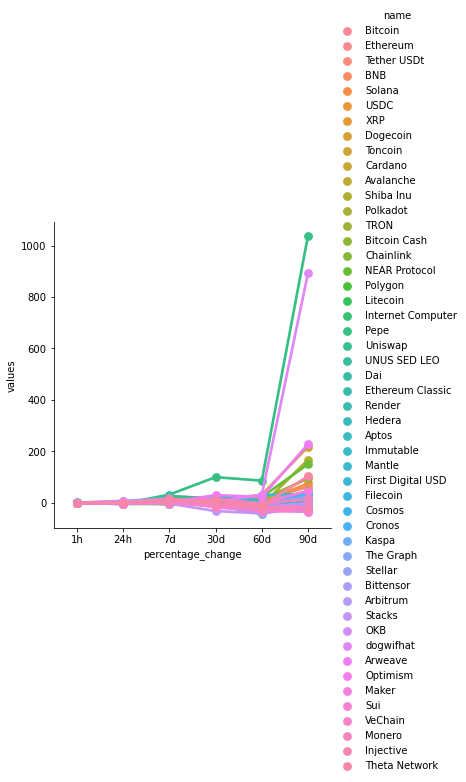

In [54]:
sns.catplot(x = 'percentage_change', y = 'values', hue = 'name', data = df5, kind = 'point')

In [59]:
df6 = df1[{'name','quote.USD.price','Timestamp'}]
df7 = df6.query("name == 'Bitcoin'")
df7

C:\Users\bindu\AppData\Local\Temp\ipykernel_29692\4275509715.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df6 = df1[{'name','quote.USD.price','Timestamp'}]


,Timestamp,quote.USD.price,name
0,2024-05-23 03:50:35.880803,69296.52355,Bitcoin
50,2024-05-23 03:51:36.980159,69313.92326,Bitcoin
100,2024-05-23 03:52:37.966110,69313.92326,Bitcoin
150,2024-05-23 03:53:38.900822,69315.11944,Bitcoin
200,2024-05-23 03:54:39.943221,69325.31318,Bitcoin


<AxesSubplot:xlabel='Timestamp', ylabel='quote.USD.price'>

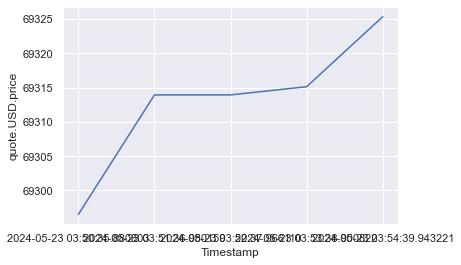

In [63]:
sns.set_theme(style = "darkgrid")

sns.lineplot(x ='Timestamp', y = 'quote.USD.price', data = df7)